In [1]:
import pandas as pd

df = pd.read_csv('coffee.csv')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [5]:
# find the total order of each product type. 
totalOrder_df = df.groupby('product_type').agg(total_order=('transaction_qty', 'sum')).reset_index()

# Display the result
print(totalOrder_df)

             product_type  total_order
0        Barista Espresso        24943
1                Biscotti         5788
2               Black tea          303
3        Brewed Black tea        17462
4         Brewed Chai tea        26250
5        Brewed Green tea         8697
6       Brewed herbal tea        17328
7                Chai tea          443
8                Clothing          221
9      Drinking Chocolate          266
10            Drip coffee        12891
11         Espresso Beans          319
12          Gourmet Beans          366
13  Gourmet brewed coffee        25973
14            Green beans          134
15              Green tea          159
16             Herbal tea          305
17          Hot chocolate        17457
18      House blend Beans          183
19             Housewares          555
20          Organic Beans          420
21      Organic Chocolate          221
22  Organic brewed coffee        13012
23                 Pastry         6961
24          Premium Beans

In [6]:
new_df = df.groupby(['product_category', 'product_type']).agg(total_order=('transaction_qty', 'sum')).reset_index()

new_df.columns = ['category', 'product', 'total_order']

# Display the new DataFrame
print(new_df)

              category                product  total_order
0               Bakery               Biscotti         5788
1               Bakery                 Pastry         6961
2               Bakery                  Scone        10465
3              Branded               Clothing          221
4              Branded             Housewares          555
5               Coffee       Barista Espresso        24943
6               Coffee            Drip coffee        12891
7               Coffee  Gourmet brewed coffee        25973
8               Coffee  Organic brewed coffee        13012
9               Coffee  Premium brewed coffee        12431
10        Coffee beans         Espresso Beans          319
11        Coffee beans          Gourmet Beans          366
12        Coffee beans            Green beans          134
13        Coffee beans      House blend Beans          183
14        Coffee beans          Organic Beans          420
15        Coffee beans          Premium Beans          4

In [10]:
new_df.category.unique()

array(['Bakery', 'Branded', 'Coffee', 'Coffee beans',
       'Drinking Chocolate', 'Flavours', 'Loose Tea',
       'Packaged Chocolate', 'Tea'], dtype=object)

In [14]:
new_df['product'].unique()

array(['Biscotti', 'Pastry', 'Scone', 'Clothing', 'Housewares',
       'Barista Espresso', 'Drip coffee', 'Gourmet brewed coffee',
       'Organic brewed coffee', 'Premium brewed coffee', 'Espresso Beans',
       'Gourmet Beans', 'Green beans', 'House blend Beans',
       'Organic Beans', 'Premium Beans', 'Hot chocolate', 'Regular syrup',
       'Sugar free syrup', 'Black tea', 'Chai tea', 'Green tea',
       'Herbal tea', 'Drinking Chocolate', 'Organic Chocolate',
       'Brewed Black tea', 'Brewed Chai tea', 'Brewed Green tea',
       'Brewed herbal tea'], dtype=object)

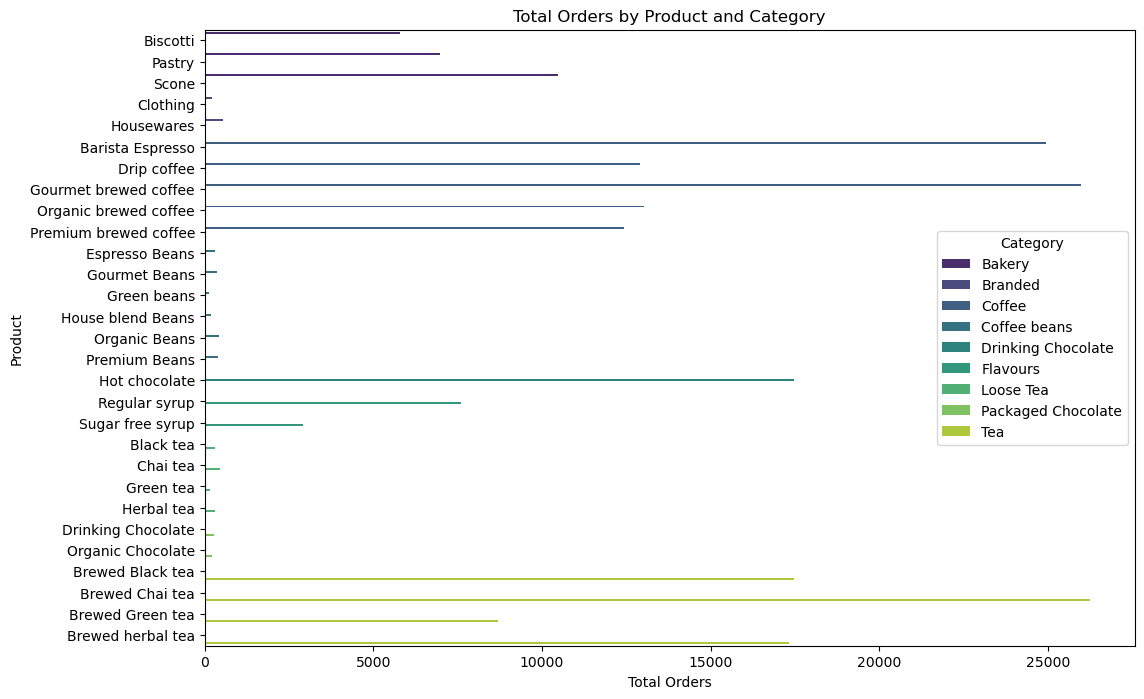

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x = 'total_order', y = 'product', hue='category', data = new_df, palette='viridis')

plt.xlabel('Total Orders')
plt.ylabel('Product')
plt.title('Total Orders by Product and Category')
plt.legend(title = 'Category')

plt.show()

<Axes: >

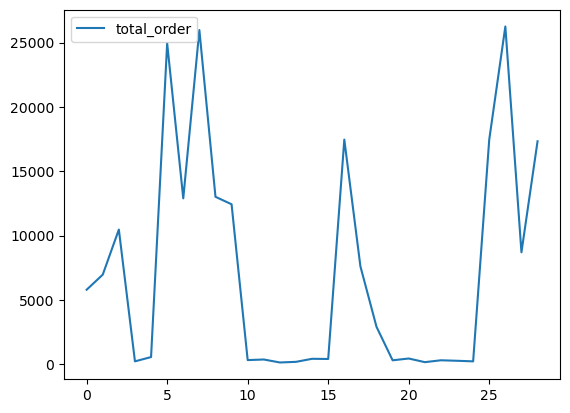

In [18]:
new_df.plot()

<Axes: ylabel='Frequency'>

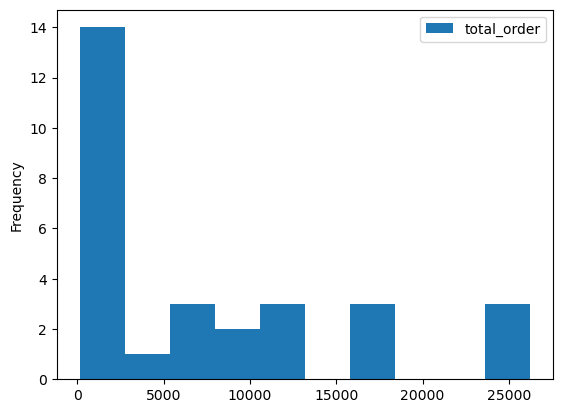

In [19]:
new_df.plot.hist()

<Axes: >

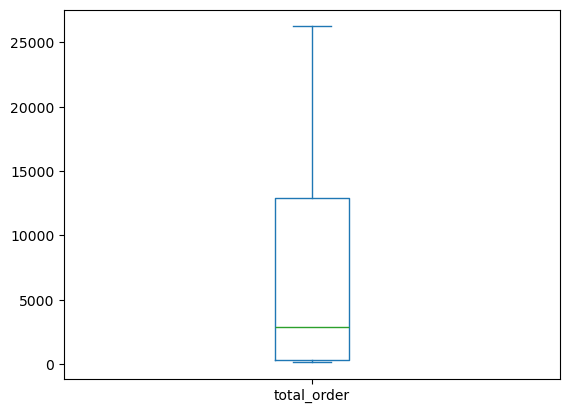

In [20]:
new_df.plot.box()

<Axes: ylabel='Density'>

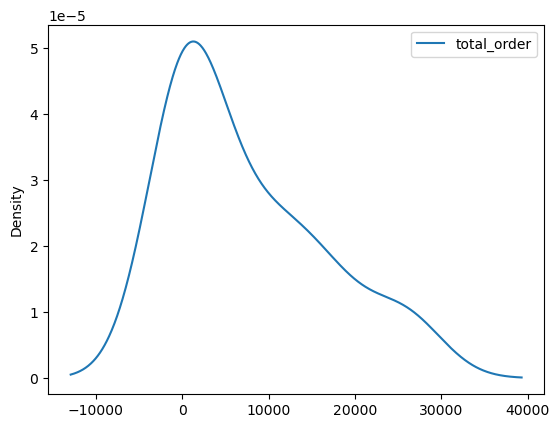

In [21]:
new_df.plot.density()

<Axes: >

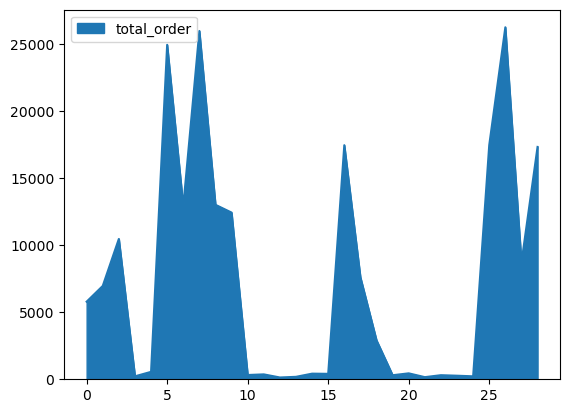

In [22]:
new_df.plot.area()

<Axes: title={'center': 'Total Orders by Product'}, ylabel='total_order'>

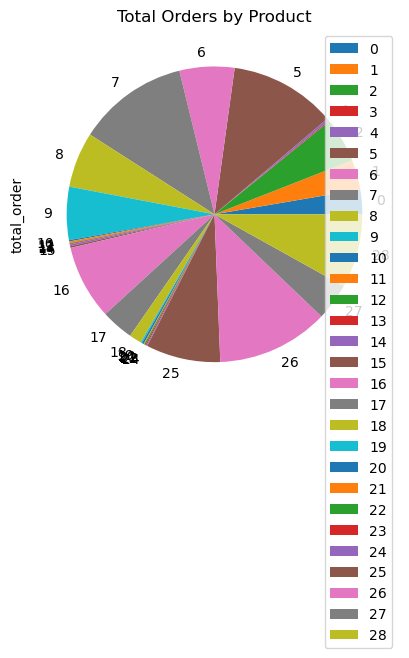

In [24]:
new_df.plot.pie(x = 'product', y = 'total_order', legend = True, title='Total Orders by Product')

<Axes: xlabel='product', ylabel='total_order'>

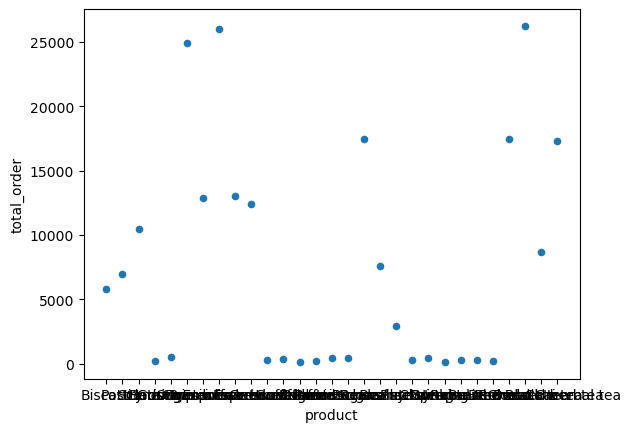

In [25]:
new_df.plot.scatter(x = 'product', y = 'total_order')

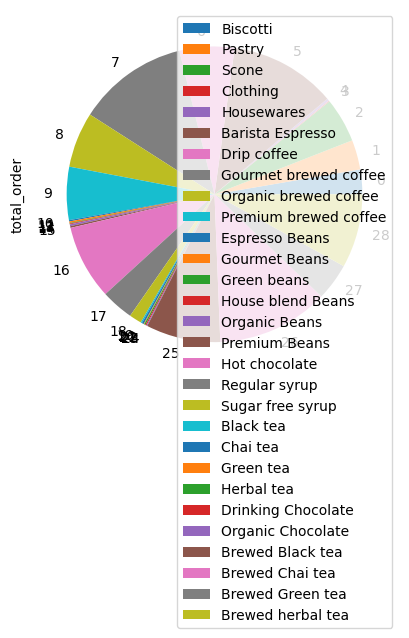

In [30]:
new_df.plot.pie(x = 'product', y = 'total_order')

labels = new_df['product'].unique()
plt.legend(labels)

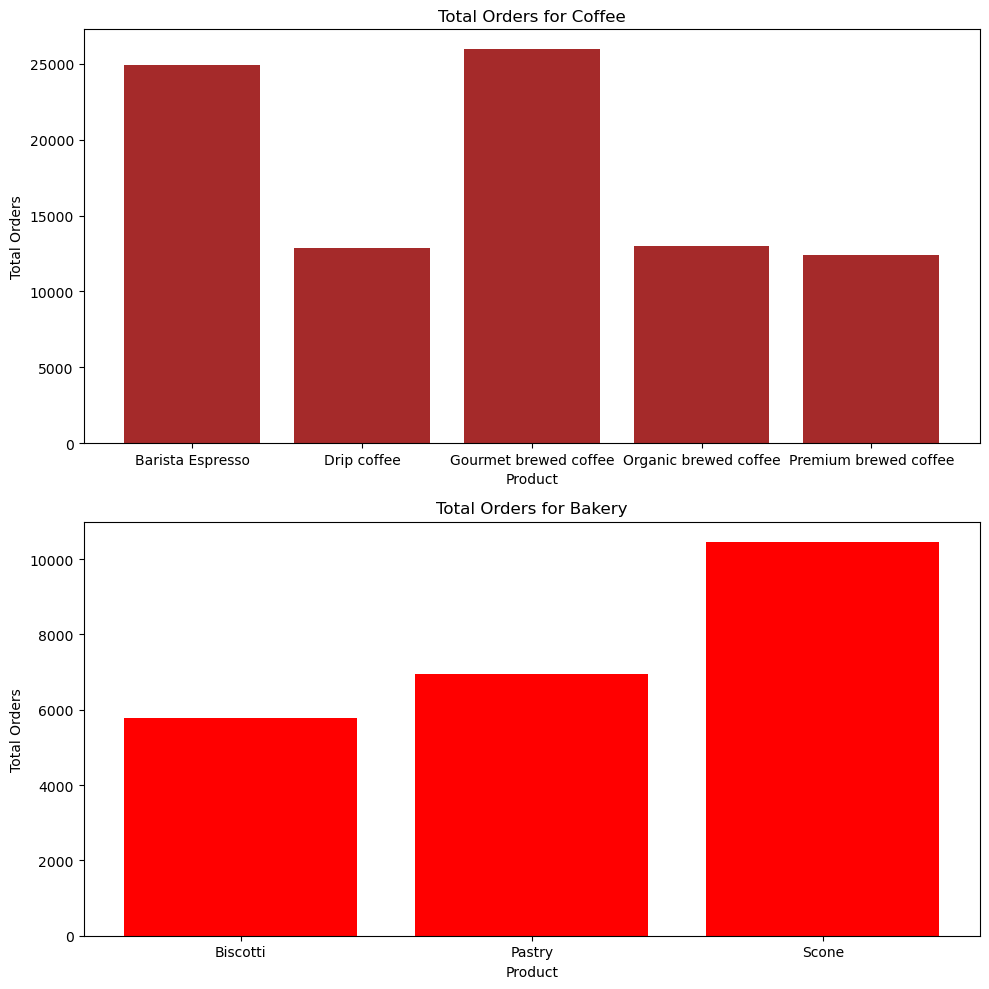

In [34]:
# comparing coffee and bakery category
df_coffee = new_df[new_df['category'] == 'Coffee']
df_bakery = new_df[new_df['category'] == 'Bakery']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.bar(df_coffee['product'], df_coffee['total_order'], color = "brown")
plt.title('Total Orders for Coffee')
plt.xlabel('Product')
plt.ylabel('Total Orders')

plt.subplot(2, 1, 2)
plt.bar(df_bakery['product'], df_bakery['total_order'], color = 'red')
plt.title('Total Orders for Bakery')
plt.xlabel('Product')
plt.ylabel('Total Orders')

plt.tight_layout()

plt.show()

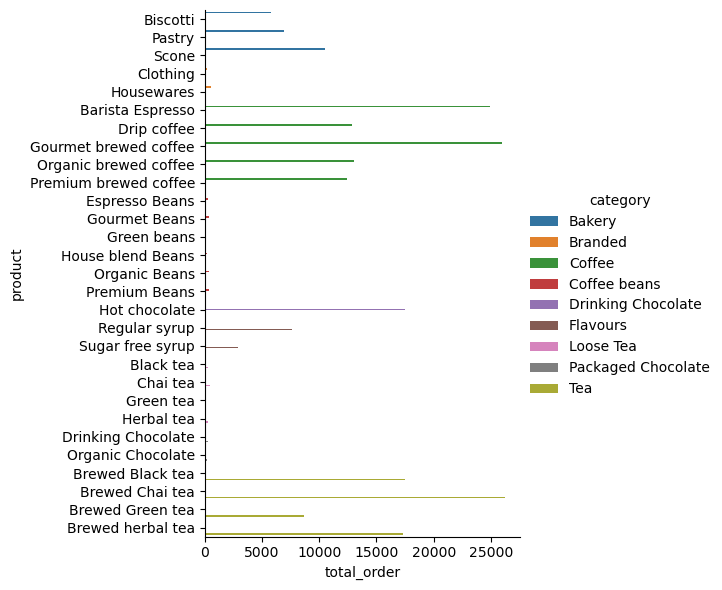

In [46]:
sns.catplot(x = 'total_order', y = 'product', hue = 'category', data = new_df, kind = 'bar', height = 6)

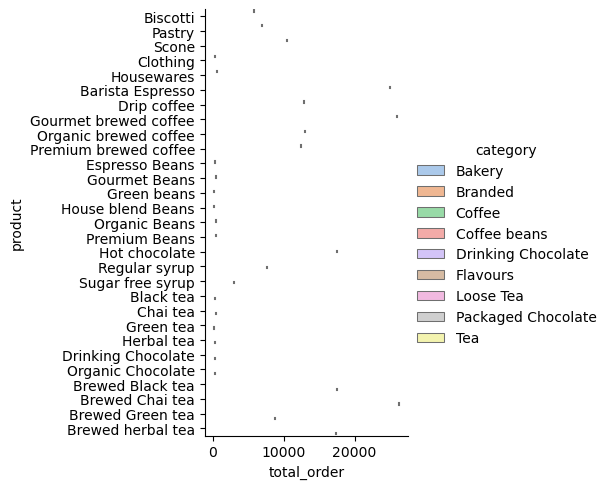

In [61]:
sns.catplot(x = 'total_order', y = 'product', kind = "violin", palette = "pastel", hue = "category", data = new_df)

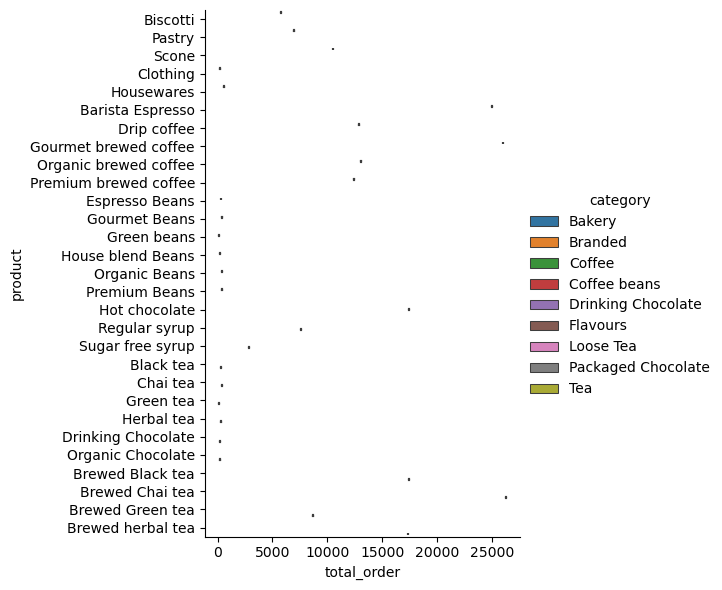

In [62]:
sns.catplot(x = 'total_order', y = 'product', hue = 'category', data = new_df, kind = 'box', height = 6)